In [10]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
    include("/home/sergey/work/repo/dynamical-systems/system.jl")
end

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


jac_FHN (generic function with 1 method)

In [11]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = 0..40, 0..1,  0..1
box = E × x × y
using CairoMakie

In [12]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [13]:
time = 500; tt = 1000; tstep = 0.001
integ_set = (alg = Vern9(), adaptive = false, dt = tstep)

(alg = Vern9(; stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false), lazy = true,), adaptive = false, dt = 0.001)

In [14]:
I0 = -1.695; U0 = 0.265;
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [4.9594801846571634, 0.775920980522911, 0.4403223065284447]    
println("last point trajectory:$u0")

last point trajectory:[4.9594801846571634, 0.775920980522911, 0.4403223065284447]


In [15]:
ds = CoupledODEs(TM, u0, p, diffeq = integ_set)
tr, trange = trajectory(ds, time; Δt = integ_set.dt, Ttr = tt);

In [16]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_)

(3-dimensional StateSpaceSet{Float64} with 1 points, Vector{ComplexF64}[[-6.438080737249817 + 0.0im, 2.124523504805518 - 13.848976855315751im, 2.124523504805518 + 13.848976855315751im]], Bool[0])

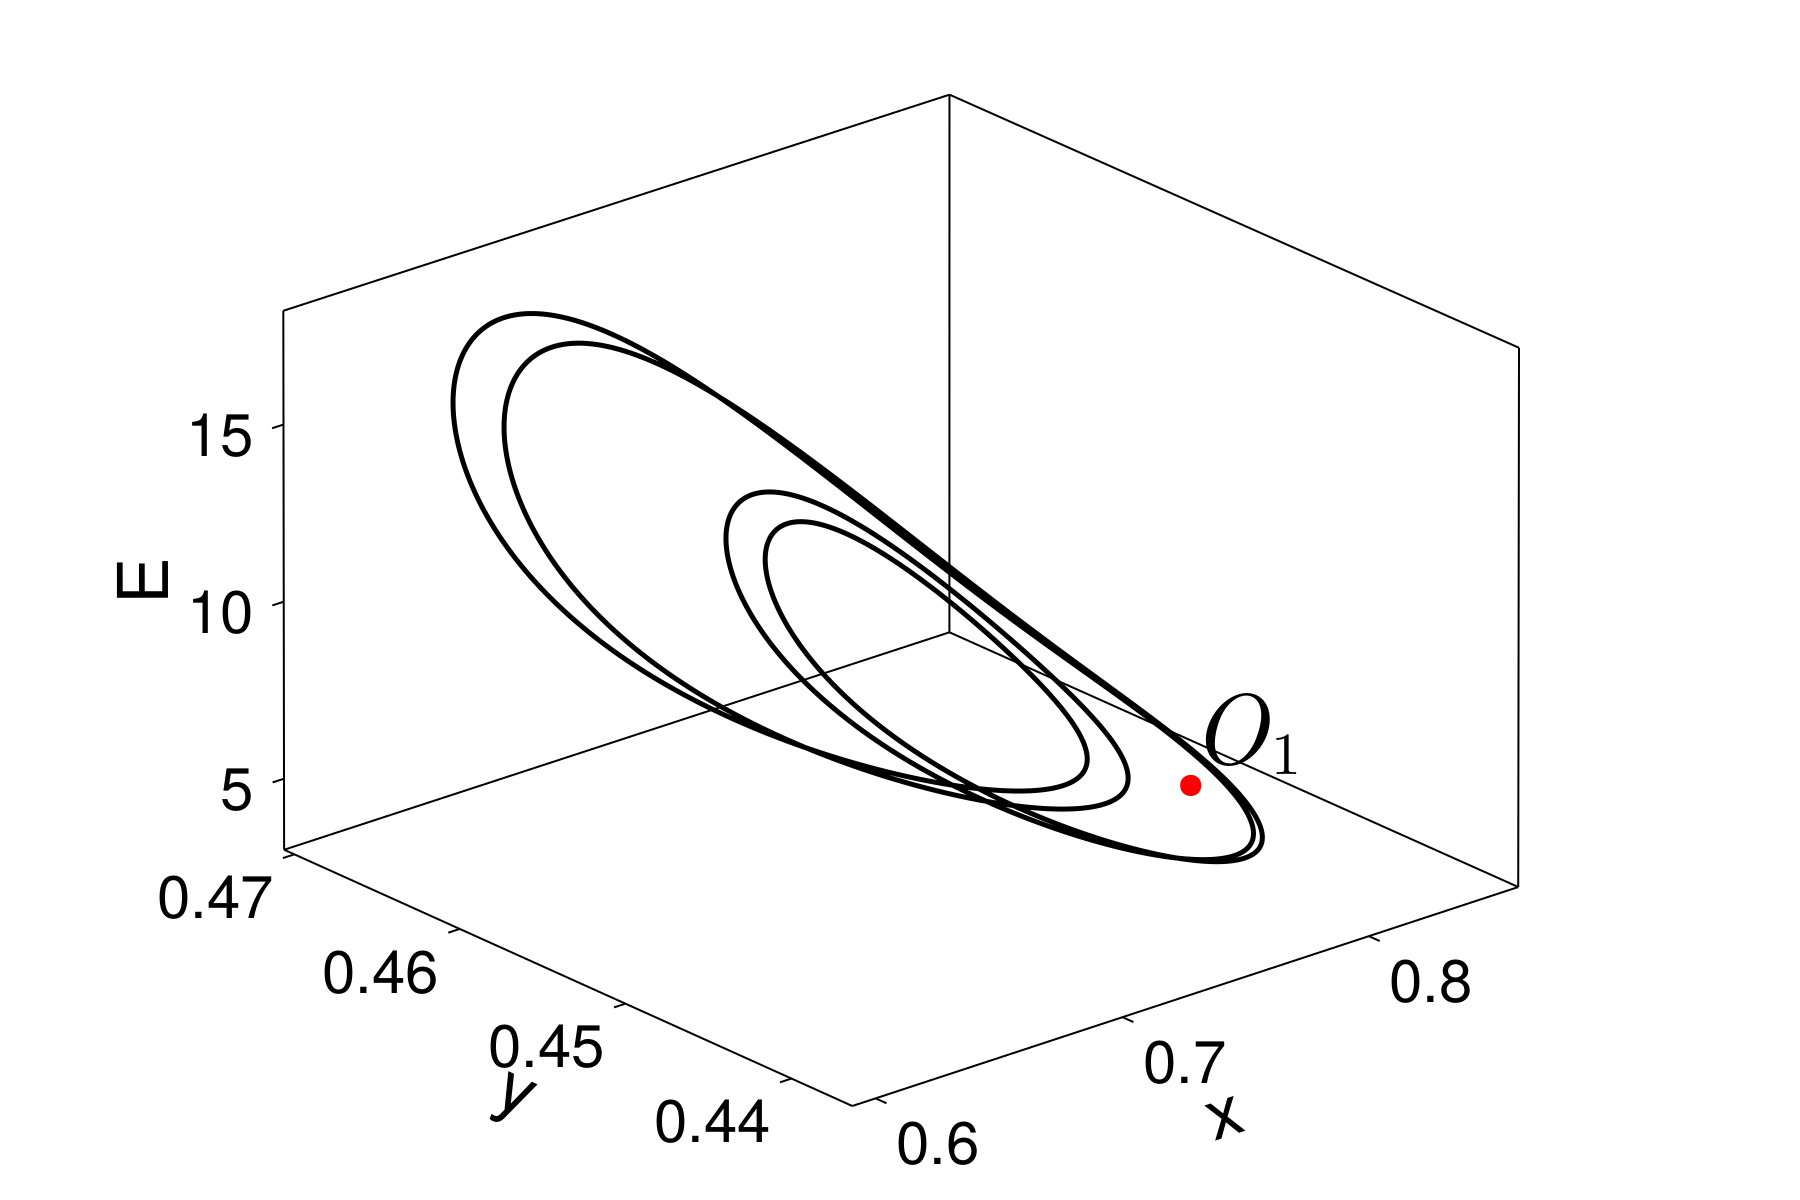

CairoMakie.Screen{IMAGE}


In [19]:
ts, tf = 96000, 100000
indexx,indexy,indexz = 2, 3, 1
lb_size = 35; tck_size = 30;

f = Figure(size = (900, 600))
axis3 = Axis3(f[1, 1], xlabel = "x", ylabel = "y", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
                xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(axis3, tr[ts:tf, indexx], tr[ts:tf, indexy], tr[ts:tf, indexz], linewidth = 2.5, color = :black)

scatter!(fp[1][indexx], fp[1][indexy], fp[1][indexz], color = :red, markersize = 15.0)
text!(fp[1][indexx], fp[1][indexy], fp[1][indexz], text = L"O_1", fontsize = 50, color = :black, align = (:left, :bottom))

display(f)

In [20]:
cd("/home/sergey/MEGA/dynamical-systems/Tsodyks Markram/images")
save("4-limit_cycle.pdf", f)

CairoMakie.Screen{PDF}
